## 1. Winter is Coming. Let's load the dataset ASAP!
<p>If you haven't heard of <em>Game of Thrones</em>, then you must be really good at hiding. Game of Thrones is the hugely popular television series by HBO based on the (also) hugely popular book series <em>A Song of Ice and Fire</em> by George R.R. Martin. In this notebook, we will analyze the co-occurrence network of the characters in the  Game of Thrones books. Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books. </p>
<p><img src="https://assets.datacamp.com/production/project_76/img/got_network.jpeg" style="width: 550px"></p>
<p>This dataset constitutes a network and is given as a text file describing the <em>edges</em> between characters, with some attributes attached to each edge. Let's start by loading in the data for the first book <em>A Game of Thrones</em> and inspect it.</p>

In [82]:
# Importing modules
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
# Reading in datasets/book1.csv
book1 = pd.read_csv('datasets/book1.csv')
# Printing out the head of the dataset
# ... YOUR CODE FOR TASK 1 ...
print(book1)

                              Source              Target        Type  weight  \
0                     Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                     Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                  Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                  Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4    Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   
..                               ...                 ...         ...     ...   
679                 Tyrion-Lannister         Willis-Wode  Undirected       4   
680                 Tyrion-Lannister               Yoren  Undirected      10   
681                  Tywin-Lannister               Varys  Undirected       4   
682                  Tywin-Lannister         Walder-Frey  Undirected       8   
683                     Waymar-Royce     Will-(prologue)  Undirected      18   

     book  
0       1  
1       1  
2  

## 2. Time for some Network of Thrones
<p>The resulting DataFrame <code>book1</code> has 5 columns: <code>Source</code>, <code>Target</code>, <code>Type</code>, <code>weight</code>, and <code>book</code>. Source and target are the two nodes that are linked by an edge. A network can have directed or undirected edges and in this network all the edges are undirected. The weight attribute of every edge tells us the number of interactions that the characters have had over the book, and the book column tells us the book number.</p>
<p>Once we have the data loaded as a pandas DataFrame, it's time to create a network. We will use <code>networkx</code>, a network analysis library, and create a graph object for the first book.</p>

In [84]:
# Importing modules
# ... YOUR CODE FOR TASK 2 ...
import networkx as nx
# Creating an empty graph object
G_book1 = nx.Graph()

## 3. Populate the network with the DataFrame
<p>Currently, the graph object <code>G_book1</code> is empty. Let's now populate it with the edges from <code>book1</code>. And while we're at it, let's load in the rest of the books too!</p>

In [86]:
# Iterating through the DataFrame to add edges
# ... YOUR CODE FOR TASK 3 ...
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

## 4. The most important character in Game of Thrones
<p>Is it Jon Snow, Tyrion, Daenerys, or someone else? Let's see! Network science offers us many different metrics to measure the importance of a node in a network. Note that there is no "correct" way of calculating the most important node in a network, every metric has a different meaning.</p>
<p>First, let's measure the importance of a node in a network by looking at the number of neighbors it has, that is, the number of nodes it is connected to. For example, an influential account on Twitter, where the follower-followee relationship forms the network, is an account which has a high number of followers. This measure of importance is called <em>degree centrality</em>.</p>
<p>Using this measure, let's extract the top ten important characters from the first book (<code>book[0]</code>) and the fifth book (<code>book[4]</code>).</p>

In [88]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]


# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 =  sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

# Printing out the top 10 of book1 and book5
# ... YOUR CODE FOR TASK 4 ...
print(sorted_deg_cen_book1)
print(sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


## 5. The evolution of character importance
<p>According to degree centrality, the most important character in the first book is Eddard Stark but he is not even in the top 10 of the fifth book. The importance of characters changes over the course of five books because, you know, stuff happens… ;)</p>
<p>Let's look at the evolution of degree centrality of a couple of characters like Eddard Stark, Jon Snow, and Tyrion, which showed up in the top 10 of degree centrality in the first book.</p>

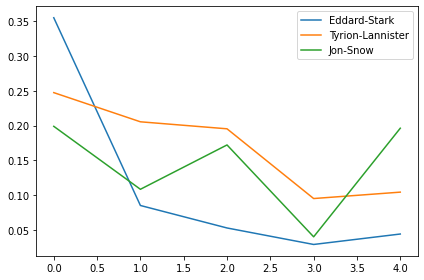

In [90]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
# ... YOUR CODE FOR TASK 5 ...
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

## 6. What's up with Stannis Baratheon?
<p>We can see that the importance of Eddard Stark dies off as the book series progresses. With Jon Snow, there is a drop in the fourth book but a sudden rise in the fifth book.</p>
<p>Now let's look at various other measures like <em>betweenness centrality</em> and <em>PageRank</em> to find important characters in our Game of Thrones character co-occurrence network and see if we can uncover some more interesting facts about this network. Let's plot the evolution of betweenness centrality of this network over the five books. We will take the evolution of the top four characters of every book and plot it.</p>

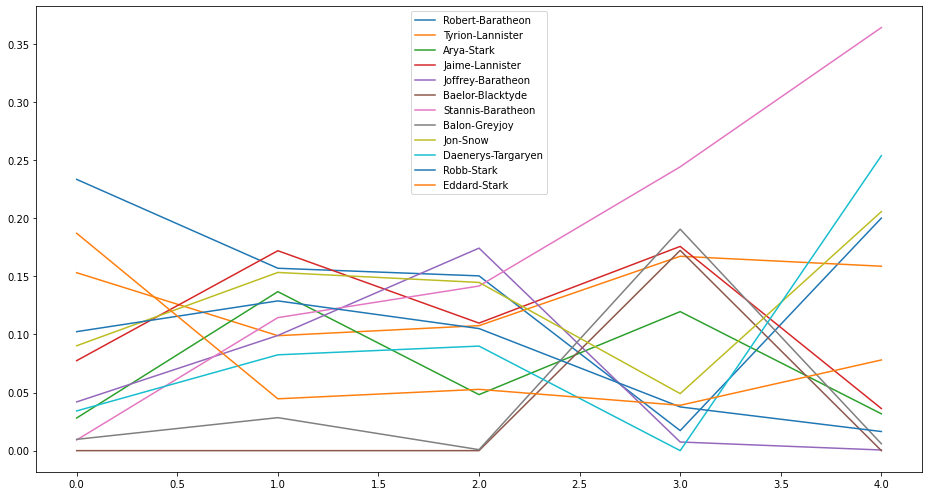

In [92]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol =[nx.betweenness_centrality(book, weight='weight') for book in books]
# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
# ... YOUR CODE FOR TASK 6 ...
betweenness_evol_df[list_of_char].plot(figsize=(13,7))

## 7. What does Google PageRank tell us about GoT?
<p>We see a peculiar rise in the importance of Stannis Baratheon over the books. In the fifth book, he is significantly more important than other characters in the network, even though he is the third most important character according to degree centrality.</p>
<p>PageRank was the initial way Google ranked web pages. It evaluates the inlinks and outlinks of webpages in the world wide web, which is, essentially, a directed network. Let's look at the importance of characters in the Game of Thrones network according to PageRank. </p>

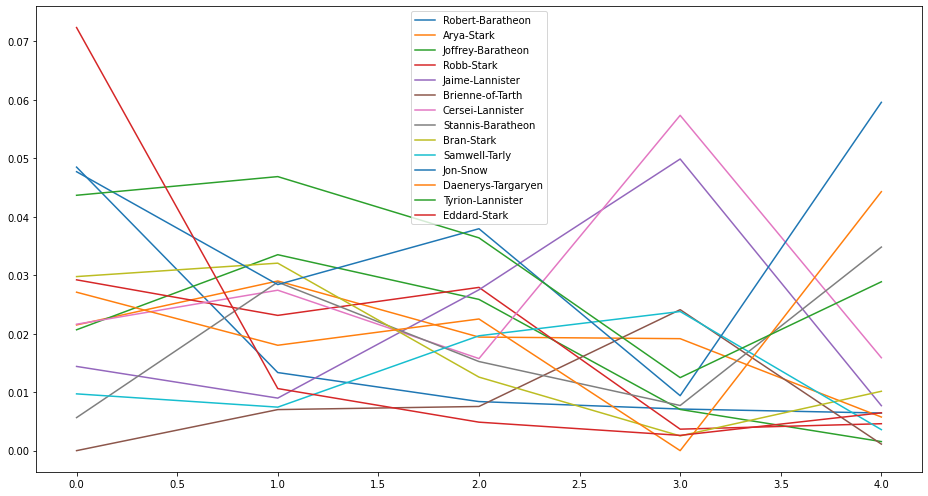

In [94]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book, weight='weight') for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
# ... YOUR CODE FOR TASK 7 ...
pagerank_evol_df[list_of_char].plot(figsize=(13,7))

## 8. Correlation between different measures
<p>Stannis, Jon Snow, and Daenerys are the most important characters in the fifth book according to PageRank. Eddard Stark follows a similar curve but for degree centrality and betweenness centrality: He is important in the first book but dies into oblivion over the book series.</p>
<p>We have seen three different measures to calculate the importance of a node in a network, and all of them tells us something about the characters and their importance in the co-occurrence network. We see some names pop up in all three measures so maybe there is a strong correlation between them?</p>
<p>Let's look at the correlation between PageRank, betweenness centrality and degree centrality for the fifth book using Pearson correlation.</p>

In [ ]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures).fillna(0)

# Calculating the correlation
# ... YOUR CODE FOR TASK 8 ...
cor.T.corr()

## 9. Conclusion
<p>We see a high correlation between these three measures for our character co-occurrence network.</p>
<p>So we've been looking at different ways to find the important characters in the Game of Thrones co-occurrence network. According to degree centrality, Eddard Stark is the most important character initially in the books. But who is/are the most important character(s) in the fifth book according to these three measures? </p>

In [98]:
# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = ...

# Printing out the top character accoding to the three measures
# ... YOUR CODE FOR TASK 9 ...

TypeError: 'ellipsis' object is not iterable